In [23]:
import pandas as pd
import seaborn as sns
import gc
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
test = pd.read_csv("../data/df_samp.csv")

In [25]:
sample = test[['meter_reading','square_feet','air_temperature','primary_use','meter']].head(400000)

In [26]:
sample.shape

(400000, 5)

In [27]:
sample.head()

,meter_reading,square_feet,air_temperature,primary_use,meter
0,1857.260,121074,12.8,Education,chilledwater
1,1097.470,61904,12.8,Education,chilledwater
2,337.683,16726,12.8,Office,chilledwater
3,1266.310,200933,12.8,Lodging/residential,chilledwater
4,337.683,21657,12.8,Education,chilledwater


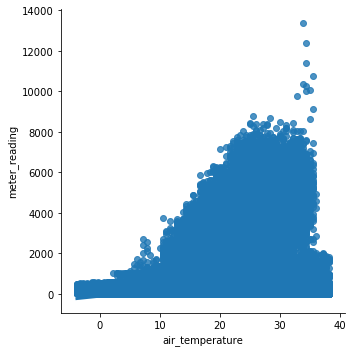

In [28]:
sns.lmplot(x='air_temperature',y='meter_reading',data=sample)

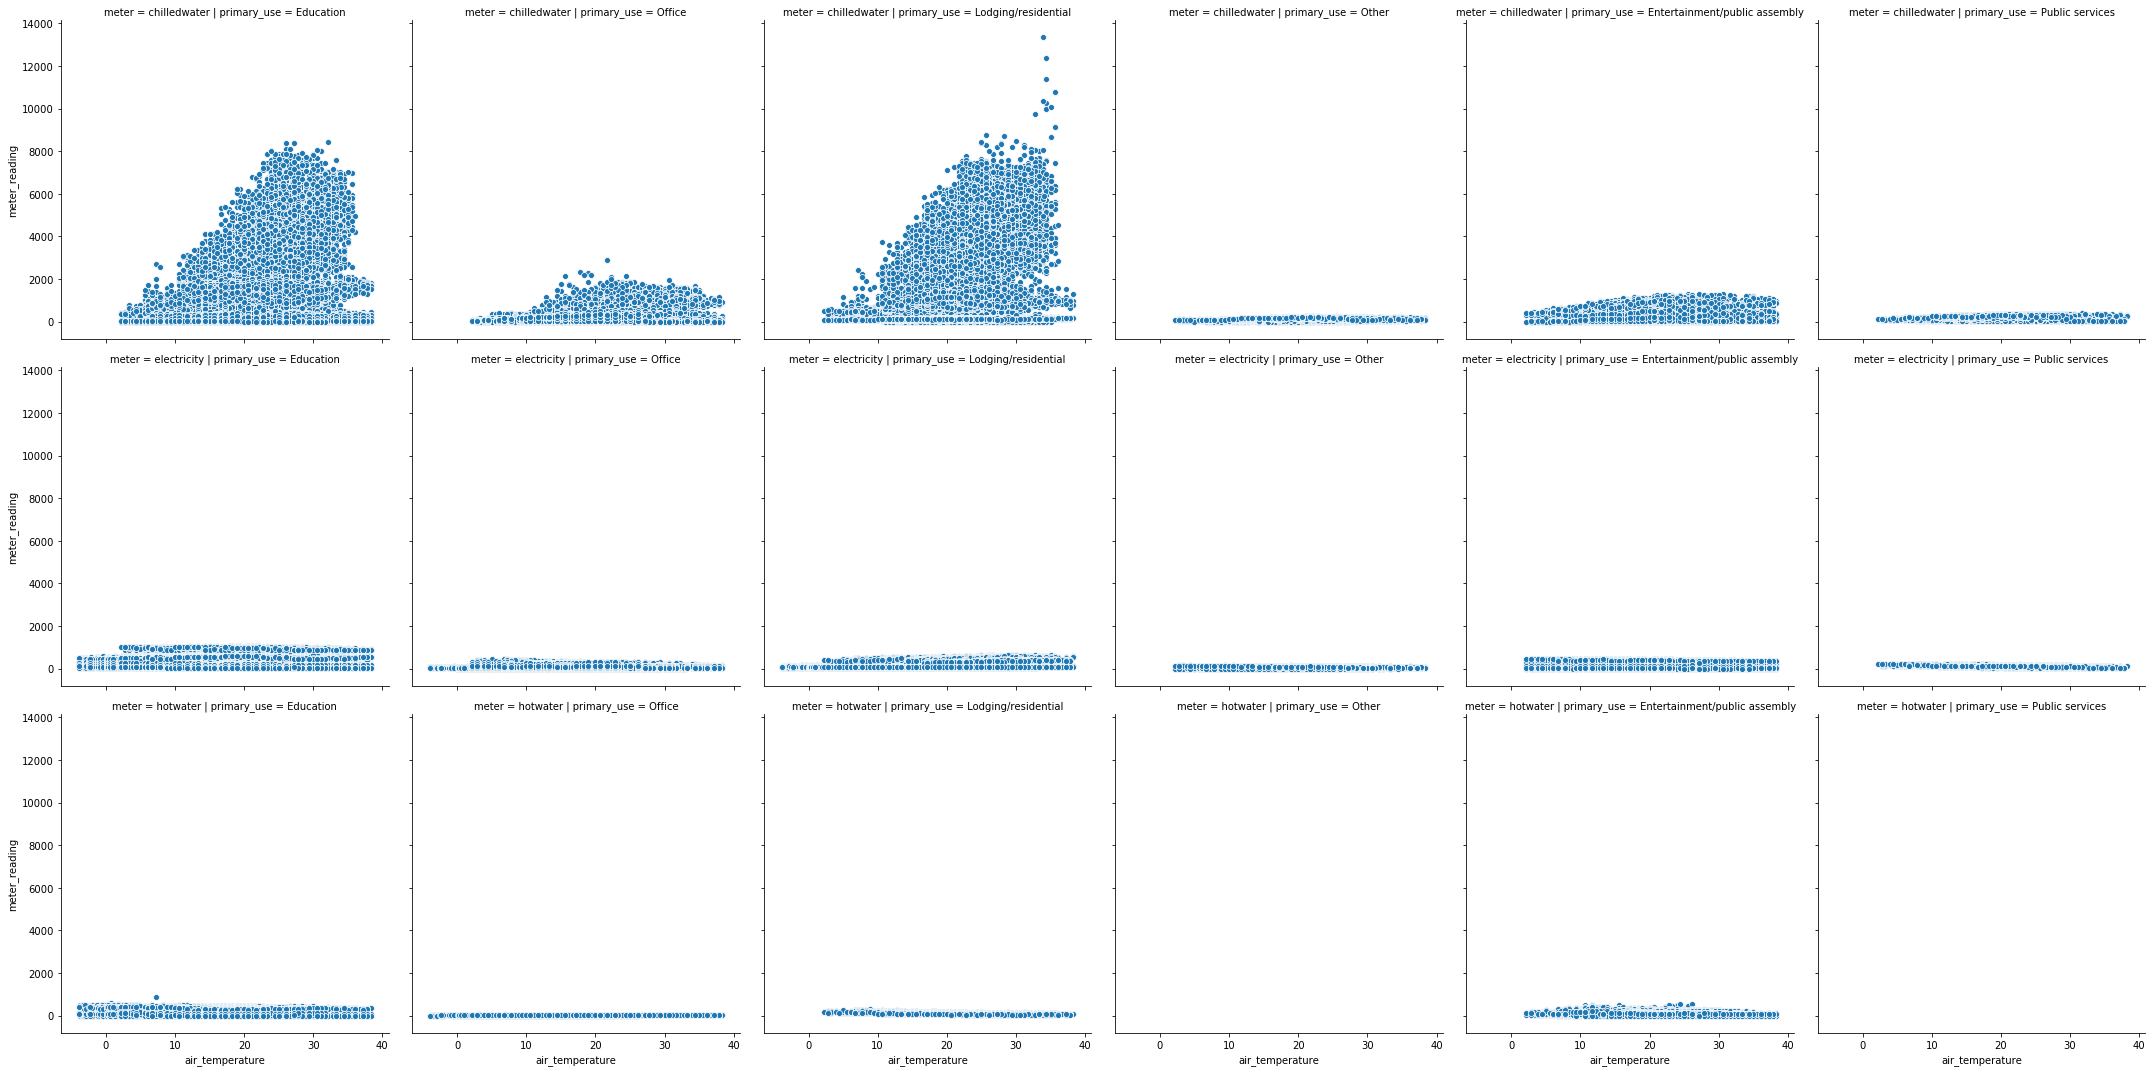

In [29]:
k = sns.relplot(x="air_temperature", y="meter_reading",
                 col="primary_use",
                 row='meter',
                 kind="scatter", data=sample)

In [30]:
def HDD(x):
    dd = 18-x
    if dd>0:
        return dd
    else:
        return 0

In [31]:
sample['HDD']=sample['air_temperature'].apply(lambda x: HDD(x))
sample[sample.HDD==0]

,meter_reading,square_feet,air_temperature,primary_use,meter,HDD
30,3461.2500,121074,21.1,Education,chilledwater,0.0
31,1983.8900,61904,21.1,Education,chilledwater,0.0
32,464.3140,16726,21.1,Office,chilledwater,0.0
33,2828.0900,200933,21.1,Lodging/residential,chilledwater,0.0
34,590.9450,21657,21.1,Education,chilledwater,0.0
...,...,...,...,...,...,...
399995,31.3703,9703,27.2,Office,chilledwater,0.0
399996,68.7800,102856,27.2,Public services,electricity,0.0
399997,206.7910,102856,27.2,Public services,chilledwater,0.0
399998,67.2300,60086,27.2,Lodging/residential,electricity,0.0


In [32]:
sample['energy_perfeet'] = sample['meter_reading']/sample['square_feet']
sample

,meter_reading,square_feet,air_temperature,primary_use,meter,HDD,energy_perfeet
0,1857.2600,121074,12.8,Education,chilledwater,5.2,0.015340
1,1097.4700,61904,12.8,Education,chilledwater,5.2,0.017729
2,337.6830,16726,12.8,Office,chilledwater,5.2,0.020189
3,1266.3100,200933,12.8,Lodging/residential,chilledwater,5.2,0.006302
4,337.6830,21657,12.8,Education,chilledwater,5.2,0.015592
...,...,...,...,...,...,...,...
399995,31.3703,9703,27.2,Office,chilledwater,0.0,0.003233
399996,68.7800,102856,27.2,Public services,electricity,0.0,0.000669
399997,206.7910,102856,27.2,Public services,chilledwater,0.0,0.002010
399998,67.2300,60086,27.2,Lodging/residential,electricity,0.0,0.001119


In [33]:
HDD(4)

14

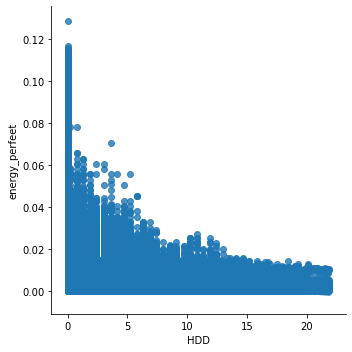

In [34]:
sns.lmplot(x='HDD',y='energy_perfeet',data=sample)

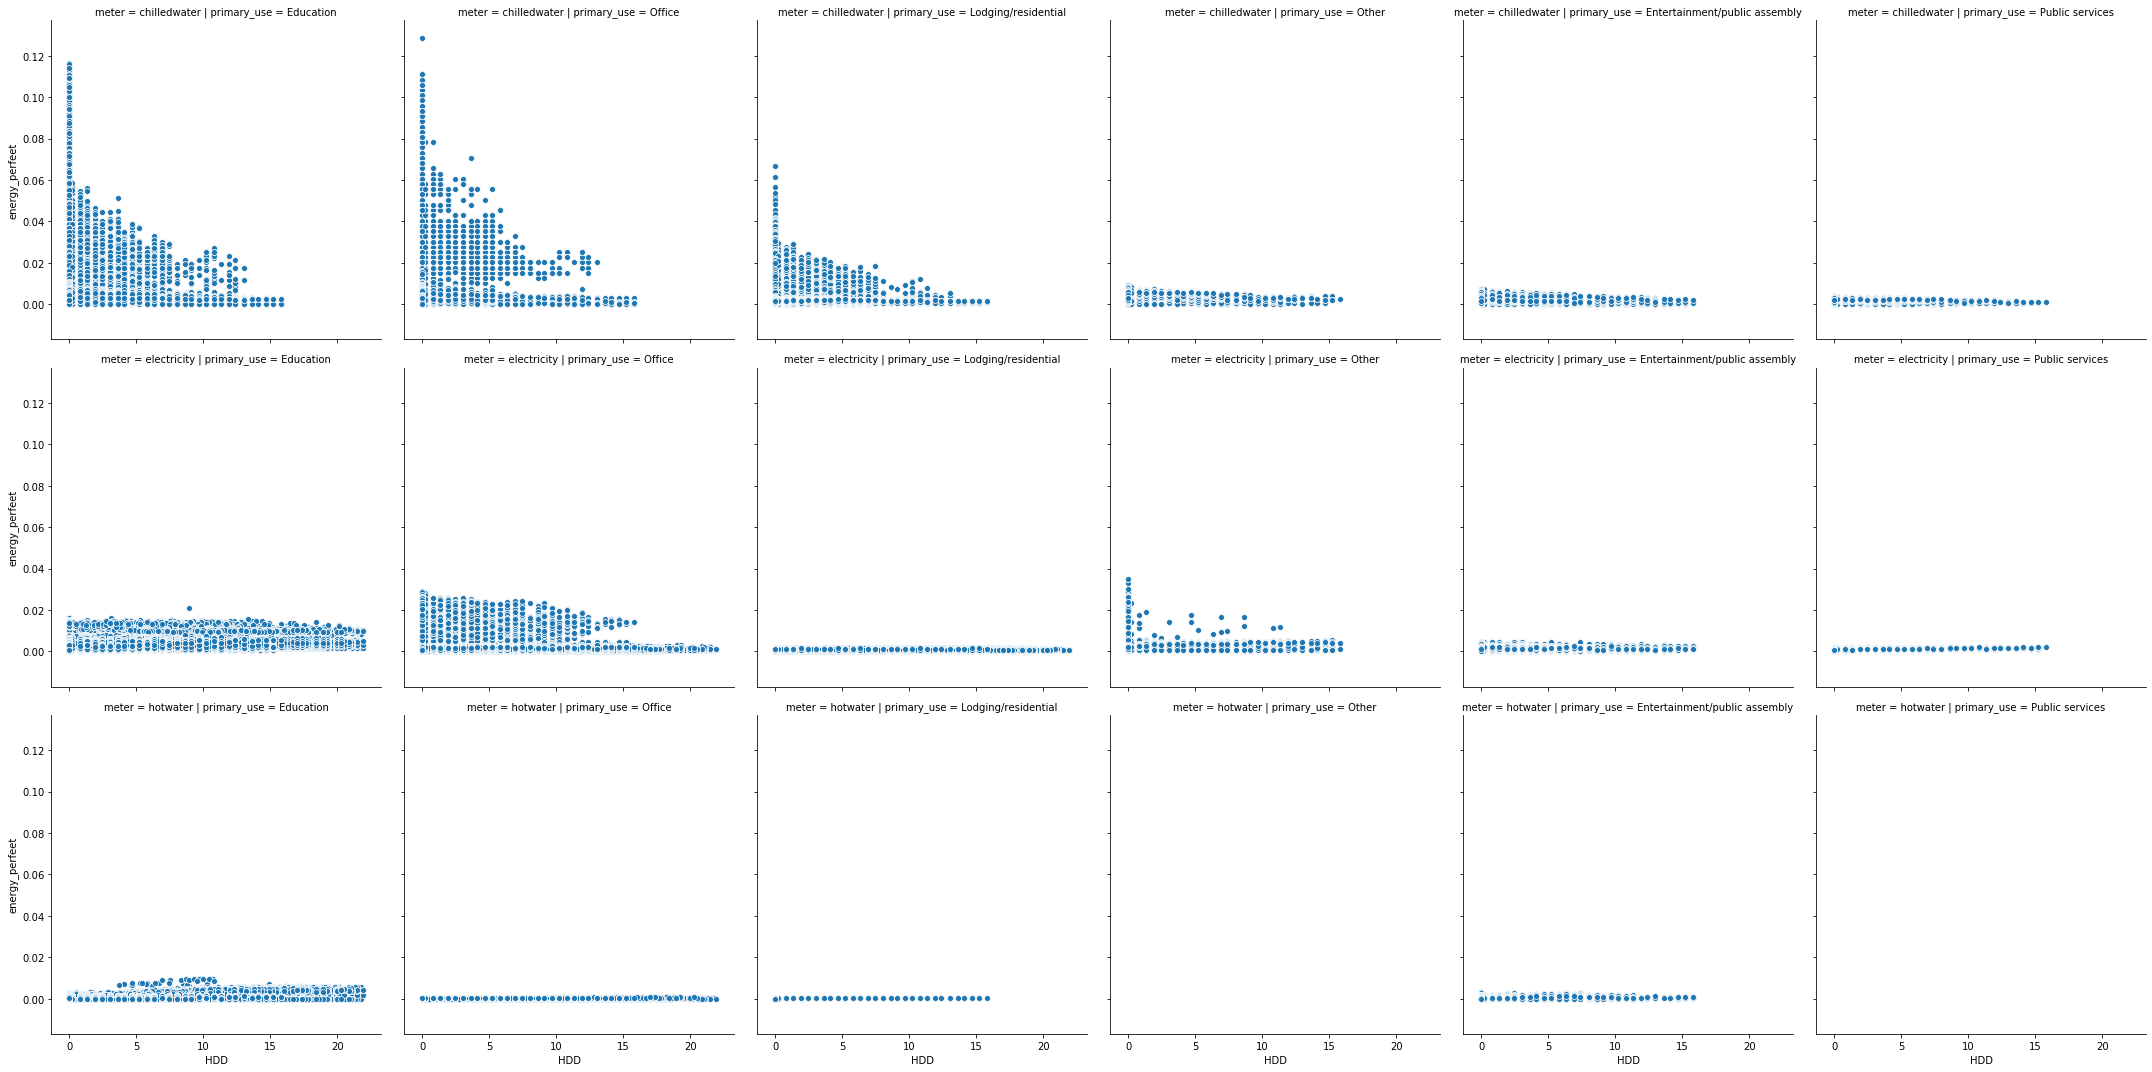

In [35]:
k = sns.relplot(x="HDD", y="energy_perfeet",
                 col="primary_use",
                 row='meter',
                 kind="scatter", data=sample)

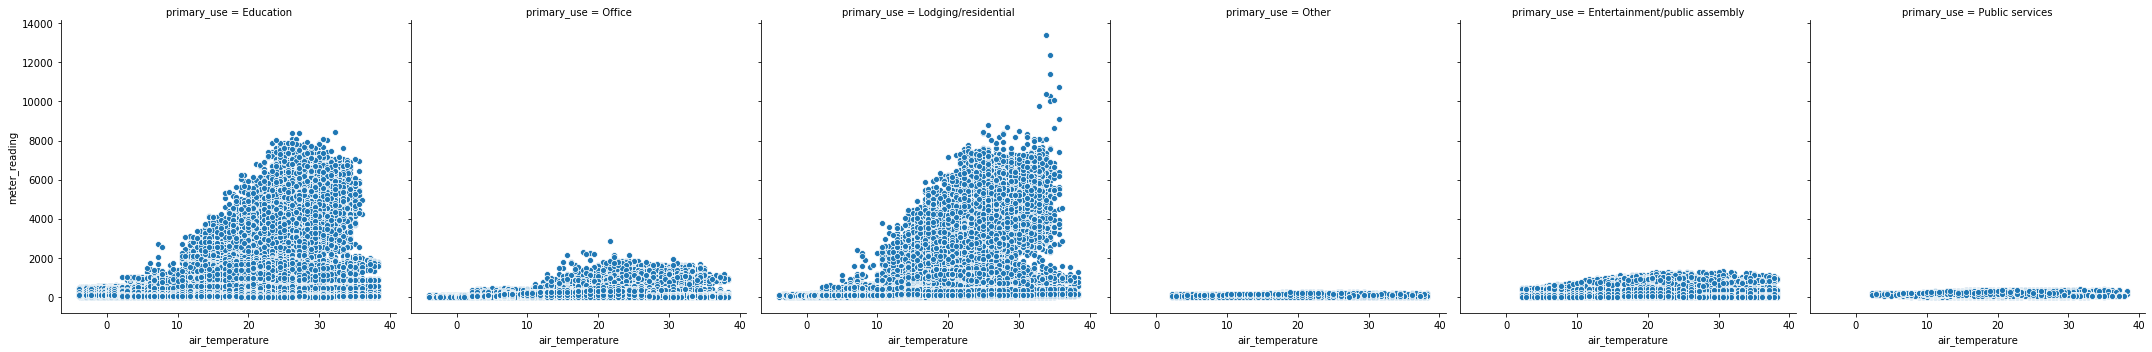

In [36]:
k = sns.relplot(x="air_temperature", y="meter_reading",
                 col="primary_use",
                 kind="scatter", data=sample)

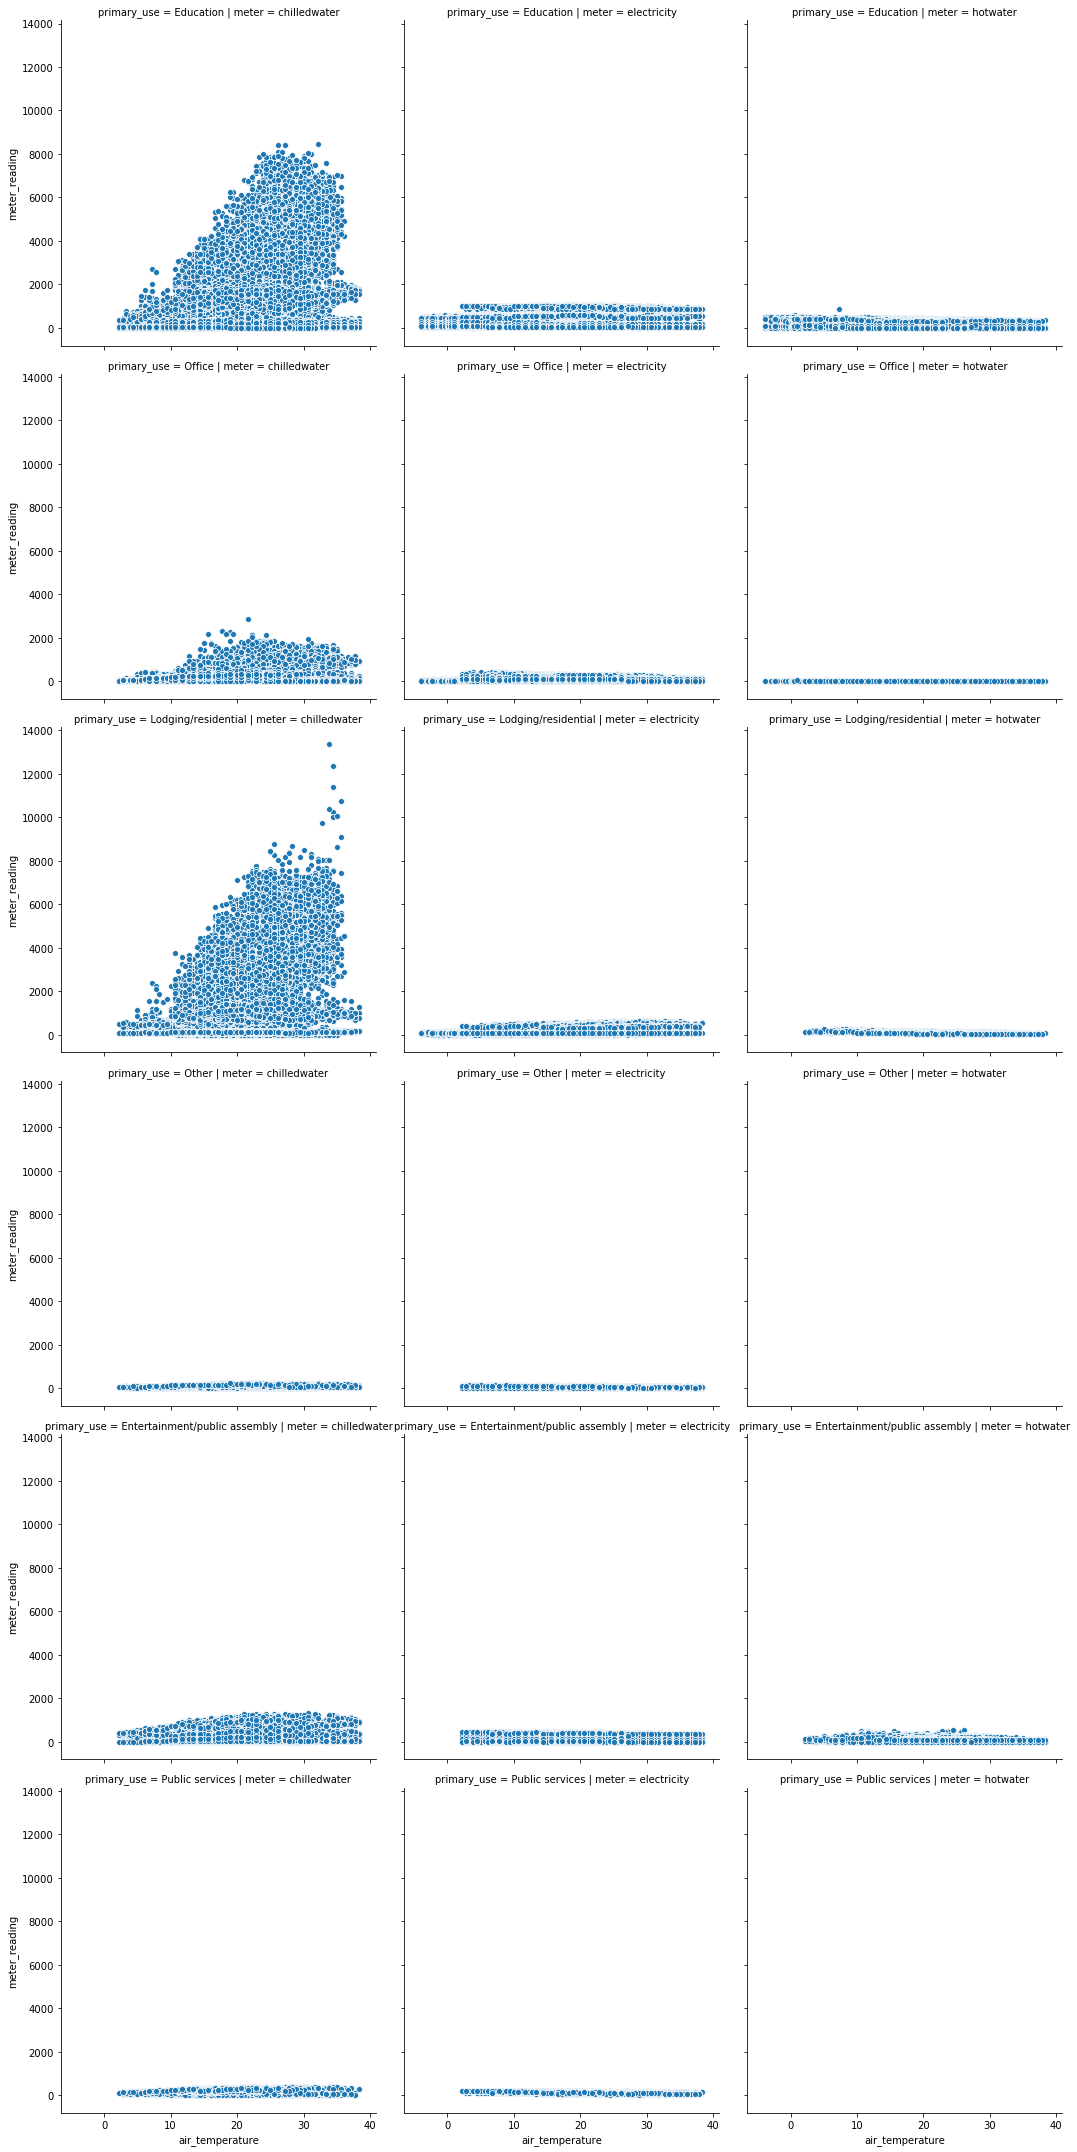

In [38]:
k = sns.relplot(x="air_temperature", y="meter_reading",
                 col="meter",
                 row = "primary_use",
                 kind="scatter", data=sample)

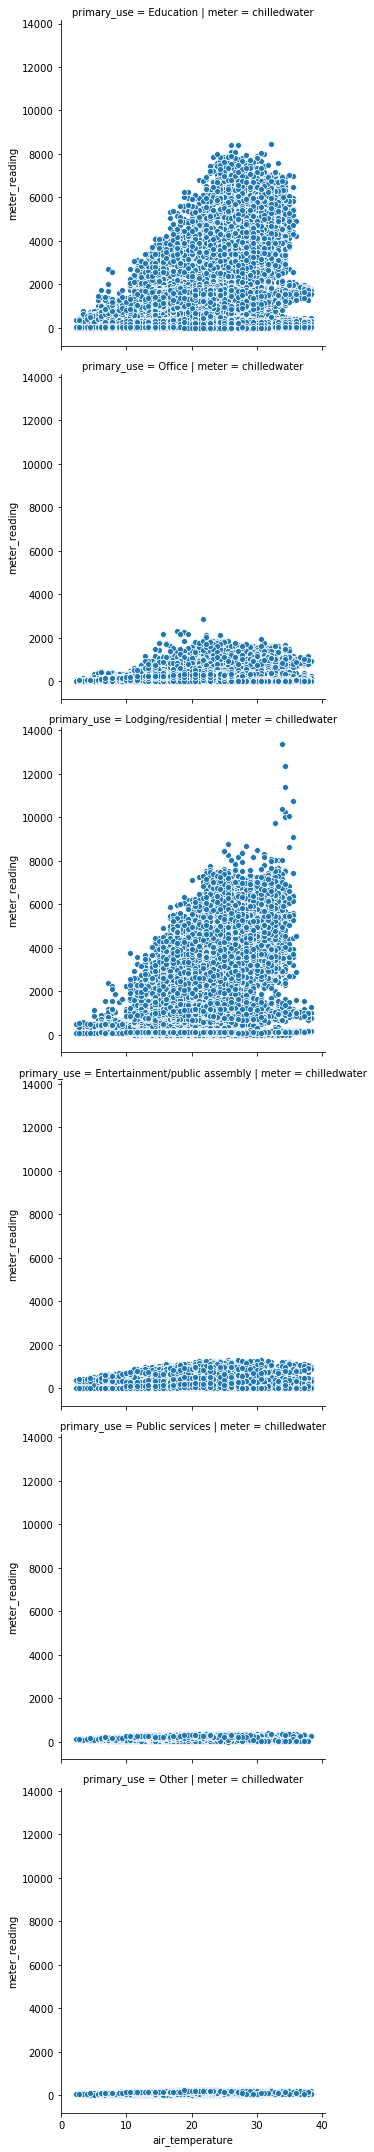

In [44]:
k = sns.relplot(x="air_temperature", y="meter_reading",
                 col="meter",
                 row = "primary_use",
                 kind="scatter", data=sample[sample['meter'] == 'chilledwater'])

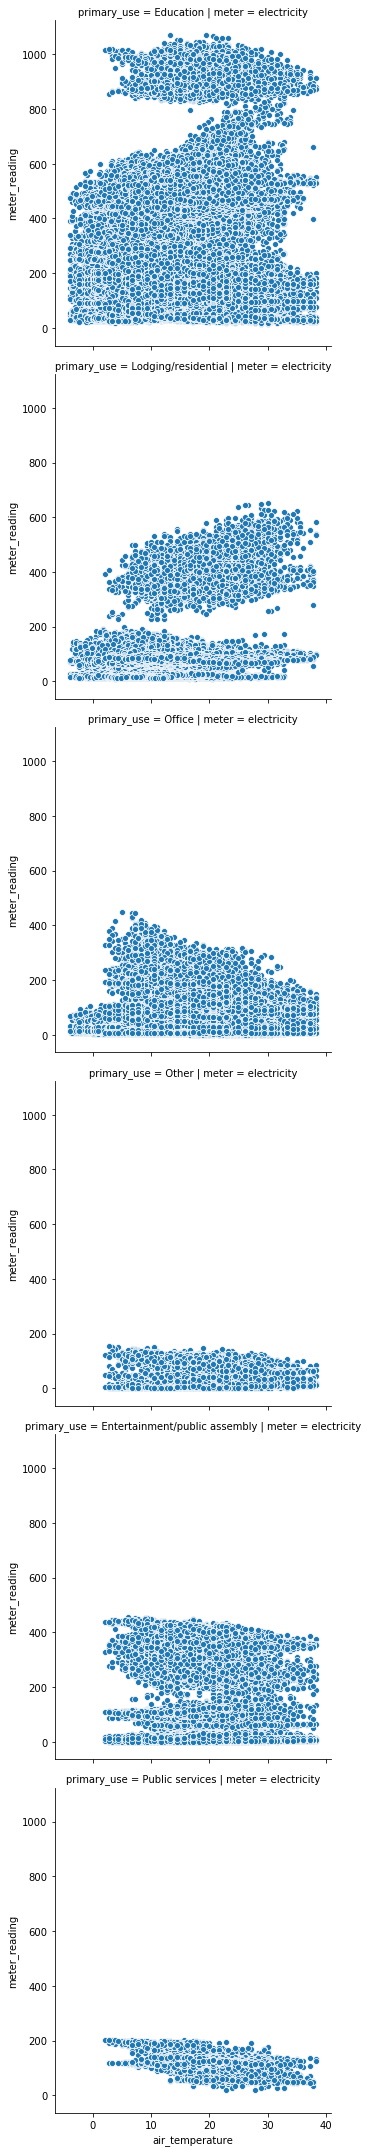

In [45]:
k = sns.relplot(x="air_temperature", y="meter_reading",
                 col="meter",
                 row = "primary_use",
                 kind="scatter", data=sample[sample['meter'] == 'electricity'])

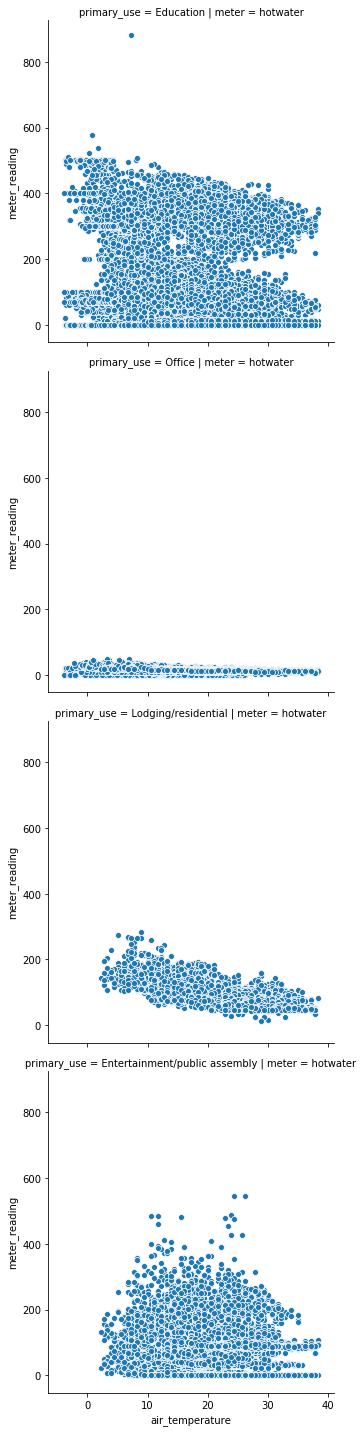

In [46]:
k = sns.relplot(x="air_temperature", y="meter_reading",
                 col="meter",
                 row = "primary_use",
                 kind="scatter", data=sample[sample['meter'] == 'hotwater'])